# Introducción a **SymPy**

## Objetivos:

- Uso de variables simbólicas.
- Suposiciones y requerimentos de las variables. 
- Manipulación de expresións sencillas en una variable.
- Creación de funciones a partir de expresiones.
- Rpresentación gráfica de regiones y funciones con **SymPy**.

## Nota previa: instalación de *Jupyter notebook* bajo Anaconda ##

Para emplear directamente este guión de prácticas desde una instalación de Python con *Anaconda*, basta con hacer click en la aplicación 'Jupyter notebook', que ya está instalada por defecto (para más detalles: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/execute.html).

Desde aquí podéis instalar *Anaconda* para vuestro sistema operativo:
https://docs.anaconda.com/anaconda/install/

## Variables, expresiones y funciones

### Instalación y carga del módulo

En Python, además de las variables numéricas, que veremos con mayor profundidad un poco más adelante, existen las variables simbólicas, que permiten calcular límites, derivadas, integrales, etc., como hacemos habitualmente en las clases de matemáticas.
Para poder hacer estas operaciones, habituales y necesarias en un curso de Cálculo, necesitamos tener instaladas la librería **SymPy**.

Este módulo no trabaja co nuna estructura de datos basada en números sino con objetos que poseen atributos y métodos que intentan reproducir el comportamiento matemático de variables, funciones, regiones, ecuaciones, etc., con las que se trabaja habitualmente en las disciplinas de álgebra y cálculo diferencial e integral. 

Para hacer que esté disponible el módulo **SymPy**, hay que instalarlo usando la herramienta `pip` (o `conda`, si trabajáis en entornos de trabajo diferenciados). Para el uso de *Microsoft Azute Notebooks* (https://notebooks.azure.com/), se utiliza la siguiente instalación:

In [2]:
!pip -q install sympy

Para disponer del módulo **SymPy** e importarlo para el resto del guión de prácticas, usaremos:

In [3]:
import sympy as sp

### Variables simbólicas
Para trabajar en modo simbólico es necesario definir variables simbólicas. Para hacer
esto usaremos la función `sp.Symbol`. 

Veamos algunos ejemplos de su uso:

In [3]:
x = sp.Symbol('x') # define la variable simbólica x
y = sp.Symbol('y') # define la variable simbólica y
f = 3*x + 5*y # ahora tenemos definida la expresion simbólica f
print(f)

a, b, c = sp.symbols('a:c') # define como simbólicas las variables a, b, c.
expresion = a**3 + b**2 + c
print(expresion)

3*x + 5*y
a**3 + b**2 + c


Por claridad en la implementación y en los cálculos, será habitual que el nombre de la variable simbólica y el nombre del objeto **SymPy** en el que se almacena coincidan, pero esto no tiene porque ser así:

In [5]:
a = sp.Symbol('x')
print(a)
a.name

x


'x'

Debemos tener claro que ahora las variables `x` o `y`, definidas antes, no son números, ni tampoco pertenecen a los objetos definidos con el módulo **NumPy**, que estudiaremos más adelante. Todas las variables simbólicas son objetos de la clase `sp.Symbol` y sus atributos y métodos son completamente diferentes a las variables numéricas y vectores de **NumPy**. 

Podemos comprobar los métodos y atributos que podemos ejecutar sobre estos objetos si ejecutamos la siguiente orden: 

In [4]:
print(type(x))
dir(x)

<class 'sympy.core.symbol.Symbol'>


['_Symbol__xnew_cached_',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__class__',
 '__complex__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getnewargs_ex__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__new_stage2__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__sympy__',
 '__truediv__',
 '__trunc__',
 '__xnew__',
 '__xor__'

Aclarado lo anterior, destaquemos que con **SymPy** se pueden definir, de manera sencilla, constantes enteras o números racionales de forma simbólica, usando el comando `sp.Integer` o `sp.Rational`. Por ejemplo, podemos definir la constante simbólica $1/3$. Si hiciéramos lo mismo con números representados por defecto en Python, obtendríamos resultados muy diferentes. Observa también la diferencia que existe entre el tipo de dato asignado en el espacio de trabajo.

In [6]:
a = sp.Rational('1/3')
b = sp.Integer('1')/sp.Integer('3')
c = 1/3
d = 1.0/3.0
print('a: ',a)
print('b: ',b)
print('c: ',c)
print('d: ',d)
print(type(a))
print(type(b))
print(type(c))
print(type(d))

a:  1/3
b:  1/3
c:  0.3333333333333333
d:  0.3333333333333333
<class 'sympy.core.numbers.Rational'>
<class 'sympy.core.numbers.Rational'>
<class 'float'>
<class 'float'>


Otra forma sencilla de manejar valores constantes mediante objetos del módulo **SymPy** es usar la función `sp.S`. Una vez hechos todos los cálculos simbólicos, si necesitamos obtener el valor numérico, utilizaremos la función `sp.N` o bien, directamente, `float`:

In [7]:
a = sp.S(2)
b = sp.S(6)
c = a/b
d = sp.N(c)
e = float(c)
print(type(a))
print(type(b))
print(type(c))
print(type(d))
print(type(e))
print(c)
print(d)
print('{0:.15f}'.format(e))

<class 'sympy.core.numbers.Integer'>
<class 'sympy.core.numbers.Integer'>
<class 'sympy.core.numbers.Rational'>
<class 'sympy.core.numbers.Float'>
<class 'float'>
1/3
0.333333333333333
0.333333333333333


A lo largo del curso utilizaremos frecuentemente dos números reales que puedes definir como constantes simbólicas: $\pi$ y el numéro $e$. De la misma manera, para operar con variables o constantes simbólicas, debemos utilizar funciones que sean capaces de manipular este tipo de objetos, todas ellas implementadas en el módulo **SymPy** (por exemplo, `sp.sin`, `sp.cos`, `sp.log`, etc).

In [8]:
p=sp.pi # definición de la constante pi
print(sp.cos(p))

e = sp.E # definición del número e
print(sp.log(e))

-1
1


### Hipótesis sobre las variables

Cuando se define una variable simbólica, se le puede asignar cierta información adicional sobre el tipo de valores que puede alcanzar, o las hipótesis que se le van a aplicar. Por ejemplo, podemos decidir antes de hacer calquier cálculo si la variable toma valores enteros o reales, si es positiva o negativa, mayor que un cierto número, *etc.*. Este tipo de información se añade en el momento de la definición de la variable simbólica como un argumento opcional.

In [9]:
x = sp.Symbol('x', nonnegative = True) # La raíz cuadrada de un número no negativo es real
y = sp.sqrt(x)
print(y.is_real)

x = sp.Symbol('x', integer = True) # La potencia de un número entero es entera
y = x**sp.S(2)
print(y.is_integer)

a = sp.Symbol('a')
b = sp.sqrt(a)
print(b.is_real)

a = sp.Symbol('a')
b = a**sp.S(2)
print(b.is_integer)

True
True
None
None


Ya que los cálculos simbólicos son consistentes en **SymPy**, se pueden también hacer comprobaciones sobre si algunas desigualdades son ciertas o no, siempre y cuando se tenga cuidado en las hipótesis que se hagan al definir las variables simbólicas.

In [10]:
x = sp.Symbol('x', real = True)
p = sp.Symbol('p', positive = True)
q = sp.Symbol('q', real = True)
y = sp.Abs(x) + p # El valor absoluto
z = sp.Abs(x) + q
print(y > 0)
print(z > 0)

True
q + Abs(x) > 0


### Expresiones simbólicas

De la misma manera que el módulo **SymPy** nos permite definir variables simbólicas, también podemos definir expresiones matemáticas a partir de estas y manipularlas, factorizarlas, expandirlas, simplificarlas, o, incluso, imprimirlas de manera similar a como lo haríamos con lápiz y papel.

In [11]:
x,y = sp.symbols('x,y', real=True)
expr = (x-3)*(x-3)**2*(y-2)
expr_long = sp.expand(expr) # Expandir expresión

print(expr_long) # Imprimir de forma estándar
sp.pprint(expr_long) # Imprimir de forma semejante a con lápiz e papel

expr_short = sp.factor(expr)
print(expr_short) # Factorizar expresión

expr = -3+(x**2-6*x+9)/(x-3)
expr_simple = sp.simplify(expr) # Simplificar expresión
sp.pprint(expr)
print(expr_simple)

x**3*y - 2*x**3 - 9*x**2*y + 18*x**2 + 27*x*y - 54*x - 27*y + 54
 3        3      2         2                            
x ⋅y - 2⋅x  - 9⋅x ⋅y + 18⋅x  + 27⋅x⋅y - 54⋅x - 27⋅y + 54
(x - 3)**3*(y - 2)
      2          
     x  - 6⋅x + 9
-3 + ────────────
        x - 3    
x - 6


Dada una expresión en **Sympy**, podemos plantear y resolver una ecuación con la misma utilizando la función `solve`, que entiende que la expresión se iguala a 0 (es decir, debemos pasar todo al primer miembro). Por ejemplo, si queremos resolver $e^{x+1}=5$ debemos pensar en $e^{x+1}-5=0$ y, entonces,

In [16]:
x = sp.Symbol('x', real = True)
expr = sp.exp(x+1)-5
solucion = sp.solve(expr,x)
print("Queremos resolver la ecuación exp(x+1)=5")
print("Solución: ", solucion)
# Nota: en casos sencillos, como este, podríamos escribir directamente
# solucion = sp.solve(sp.exp(x+1)-5,x)

Queremos resolver la ecuación exp(x+1)=5
Solución:  [-1 + log(5)]


Dada una expresión en **SymPy**, también se puede manipularla, sustituyendo unas variables simbólicas por otras o, incluso, reemplazando las variables simbólicas por constantes. Para hacer este tipo de sustituciones se utiliza la función `subs` y los valores a utilizar en la sustitución vienen definidos por un diccionario de Python:

In [5]:
x,y = sp.symbols('x,y', real=True)
expr = x*x + x*y + y*x + y*y
res = expr.subs({x:1, y:2}) # Sustitutición de las variables simbólicas por constantes
print(res)
print('/*\n//////////////////////////////////\n*/')
expr_sub = expr.subs({x:1-y}) # Susitución de variable simbólica por una expresión
sp.pprint(expr_sub)
print('/*\n//////////////////////////////////\n*/')
print(sp.simplify(expr_sub))

9
/*
//////////////////////////////////
*/
 2                        2
y  + 2⋅y⋅(1 - y) + (1 - y) 
/*
//////////////////////////////////
*/
1


### **Ejercicios** 

1. Define la expresión dada por la suma de $\displaystyle a+a^2+a^3+\ldots+a^N$, donde $a$ es una variable real arbitraria y $N$ un valor entero positivo.

2. ¿Cuál es el valor exacto de la expresión anterior cuando $N=15$ y $a=5/6$? ¿Cuál es el valor numérico en coma flotante?

In [7]:
# ESCRIBE AQUÍ TU CÓDIGO

a = 5/6
N = 15

expr = 0
for i in range(N):
    expr += a**N

print(expr)


    

0.9735820727831175


## Representación gráfica

Antes de empezar, para cualquier duda, podéis consultar, en el siguiente link, la documentación oficial de **SymPy** sobre representación gráfica: 
https://docs.sympy.org/latest/modules/plotting.html

### Regiones en el plano

Podemos representar regiones con la instrucción `plot_implicit`, para la cual podremos utilizar como argumento una igualdad o una desigualdad:

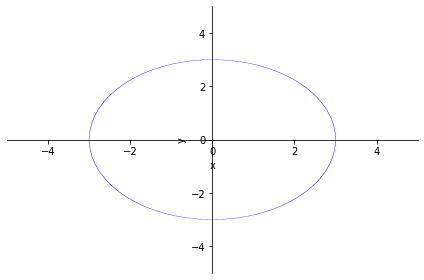

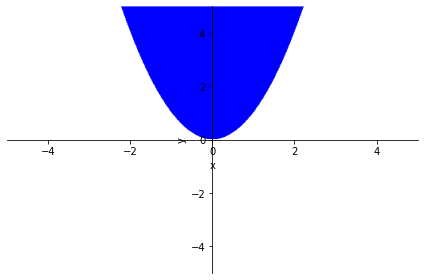

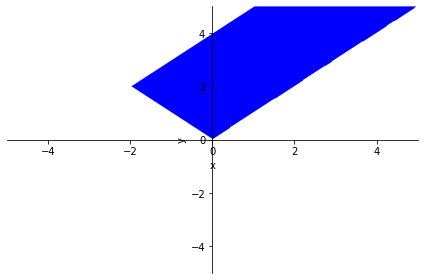

In [14]:
x, y = sp.symbols('x:y', real=True)

p1 = sp.plot_implicit(sp.Eq(x**2 + y**2, 3**2))  # Con una igualdad: Representamos gráficamente la circunferencia de centro (0,0) y radio 3
p2 = sp.plot_implicit(y > x**2)  # Utilizamos ahora una desigualdad
p3 = sp.plot_implicit(sp.And(sp.And(y > x, y > -x), y < x + 4))  # Dos desigualdades, ligadas, en este caso, con el operador lógico `sp.And` (en otros casos, usaremos `sp.Or`)


**Ejercicio:**
 
Representa gráficamente las siguientes regiones o conjuntos en el plano:
- El conjunto de puntos que satisfacen $y=2x^2-3$.
- La región, en el plano, de los puntos que cumplen $y<x^2$ e $|y|<2$. 
- La región, en el plano, de los puntos que cumplen $y>x$ ou $y<-2x$.
- La región, en el plano, de los puntos que están en el interior de un paralelogramo de vértices $(0,0)$, $(0,1)$, $(1,1)$ y $(1,2)$.

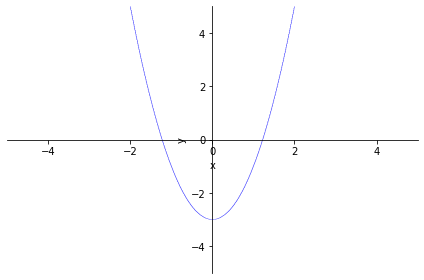

/*


*/


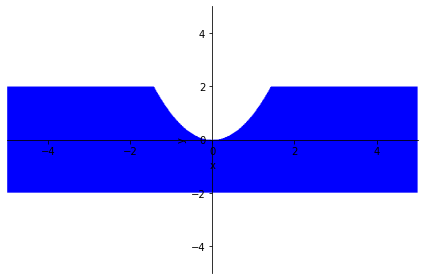

/*


*/


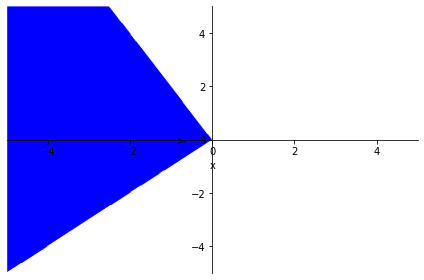

/*


*/


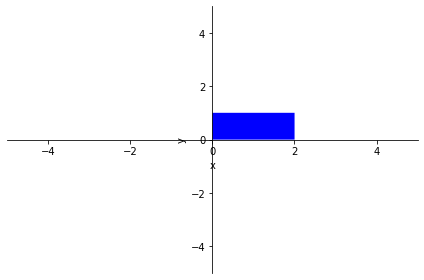

In [14]:
# Escribe aquí tu código

x, y = sp.symbols('x:y', real=True)

p1 = sp.plot_implicit(sp.Eq((2*x**2)-3, y))
print('/*\n\n\n*/')

p2 = sp.plot_implicit(sp.And(sp.And(y < x**2), sp.Abs(y) < 2))
print('/*\n\n\n*/')

p3 = sp.plot_implicit(sp.And(sp.And(y > x), y < -2*x))
print('/*\n\n\n*/')

p4 = sp.plot_implicit(sp.And(sp.And(x > 0), y < 1, x <= 2, y >= 0))

### Gráficas de funciones

Para graficar funciones con **SymPy** utilizaremos, dentro de este paquete, la orden `plot` y a continuación la expresión de la función que queramos graficar. 
En el ejemplo a continuación mostramos algunas de las opciones en la representación:

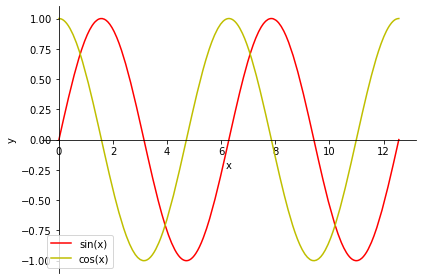

In [15]:
x = sp.symbols('x', real=True)
p = sp.plot(sp.sin(x), sp.cos(x), (x, 0, 4*sp.pi), show=False)
p[0].line_color='r'
p[1].line_color='y'
p.xlabel='x'
p.ylabel='y'
p.legend=True
p.show()